# Import Data and Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import model_selection # Library untuk proses prediksi
from sklearn.model_selection import KFold, RepeatedKFold # Library untuk penerapan KFold Validation
from sklearn.model_selection import cross_val_score # Library untuk menampilkan nilai pengujian Cross Validation (nilai return nya berupa array)
from sklearn.model_selection import cross_validate # ...
from sklearn.model_selection import train_test_split # Library untuk memisahkan data menjadi data training:testing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # library untuk menerapkan gridsearch
from sklearn.metrics import roc_auc_score , roc_curve , make_scorer , accuracy_score , precision_score , recall_score , f1_score, confusion_matrix, classification_report # Menampilkan hasil tes

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
# Dataset
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Preparing the Dataset

Note : Metode klasifikasi di python tidak bisa berjalan jika masih berupa object (string), sehingga data perlu diubah menjadi angka (integer/float) seperti yang dijelaskan pada tutorial 1. Selain itu, data kosong (nan) juga tidak bisa digunakan.

In [4]:
titanic1 = titanic.copy()
titanic1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
# kita cek berapakah umur yang paling banyak 
age_max = titanic1['age'].value_counts().idxmax()
print("Umur penumpang mayoritas berusia {}".format(age_max))

# memberikan nilai umur yang paling banyak
titanic1['age'] = titanic1['age'].fillna(age_max)
titanic1

Umur penumpang mayoritas berusia 24.0


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,24.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
# Hapus kolom deck, karena banyak yg null
titanic1 = titanic1.drop(columns = 'deck')
titanic1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,24.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


Pengecekan indikasi "data leakage"


> Sebuah variabel/fitur yang membuat model sudah tau karakteristik data kita akan menjadi apa. Sama seperti kita mau ujian tapi sudah tau kunci jawabannya


Ref: https://machinelearningmastery.com/data-leakage-machine-learning/



In [7]:
# cek nilai survived & alive
titanic1[['survived', 'alive']]

,survived,alive
0,0,no
1,1,yes
2,1,yes
3,1,yes
4,0,no
...,...,...
886,0,no
887,1,yes
888,0,no
889,1,yes


'survived' dan 'alive' merepresentasikan informasi yang sama, yaitu apakah suatu penumpang selamat atau tidak dari kecelakaan Titanic. Oleh karena itu, kita hapus salah satu variabel yaitu 'alive'

In [8]:
titanic1 = titanic1.drop(columns = 'alive')
titanic1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,True
888,0,3,female,24.0,1,2,23.4500,S,Third,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,True


In [9]:
# cek kolom pclass dan class
titanic1[['pclass', 'class']]

,pclass,class
0,3,Third
1,1,First
2,3,Third
3,1,First
4,3,Third
...,...,...
886,2,Second
887,1,First
888,3,Third
889,1,First


Sama seperti 'survived' dan 'alive' sebelumnya, 'pclass' dan 'class' memiliki kemiripan. Oleh karena itu, kita coba hapus kolom 'class' karena kolom pclass sudah representatif

In [10]:
titanic1 = titanic1.drop(columns = 'class')
titanic1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,woman,False,Southampton,True
888,0,3,female,24.0,1,2,23.4500,S,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,man,True,Cherbourg,True


***---------- Sebuah catatan ----------***

Praproses dilakukan sesuai referensi masing-masing, boleh melakukan seperti mengubah/menambahkan kolom baru yang lebih mudah diolah namun tetap representatif terhadap data yang ada
misalnya menggunakan kolom who, namun untuk nilai child dipecah menjadi dua misal child-male dan child-female atau boy dan girl



Jadi, silahkan lakukan proses rekayasa fitur menurut pandangan kalian seekspresif dan sebebas mungkin selama fitur yang direkayasa tersebut masih masuk akal

> Mengubah nilai pad fitur 'sex' menjadi 1 untuk male dan 0 untuk female

In [11]:
titanic1 = titanic1.replace({'sex' : {'male': 1 , 'female': 0}})
titanic1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,S,man,True,Southampton,False
1,1,1,0,38.0,1,0,71.2833,C,woman,False,Cherbourg,False
2,1,3,0,26.0,0,0,7.9250,S,woman,False,Southampton,True
3,1,1,0,35.0,1,0,53.1000,S,woman,False,Southampton,False
4,0,3,1,35.0,0,0,8.0500,S,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,man,True,Southampton,True
887,1,1,0,19.0,0,0,30.0000,S,woman,False,Southampton,True
888,0,3,0,24.0,1,2,23.4500,S,woman,False,Southampton,False
889,1,1,1,26.0,0,0,30.0000,C,man,True,Cherbourg,True


> Mengubah nilai pad fitur 'alone' menjadi 1 untuk male dan 0 untuk female

In [12]:
titanic1 = titanic1.replace({'alone' : {True: 1, False: 0}})
titanic1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,S,man,True,Southampton,0
1,1,1,0,38.0,1,0,71.2833,C,woman,False,Cherbourg,0
2,1,3,0,26.0,0,0,7.9250,S,woman,False,Southampton,1
3,1,1,0,35.0,1,0,53.1000,S,woman,False,Southampton,0
4,0,3,1,35.0,0,0,8.0500,S,man,True,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,man,True,Southampton,1
887,1,1,0,19.0,0,0,30.0000,S,woman,False,Southampton,1
888,0,3,0,24.0,1,2,23.4500,S,woman,False,Southampton,0
889,1,1,1,26.0,0,0,30.0000,C,man,True,Cherbourg,1


> Mencoba menerapkan one-hot encoding untuk merubah data kategorikal menjadi numerik

In [13]:
# cek kolom embarked & embark_town
titanic1[['embarked', 'embark_town']]

,embarked,embark_town
0,S,Southampton
1,C,Cherbourg
2,S,Southampton
3,S,Southampton
4,S,Southampton
...,...,...
886,S,Southampton
887,S,Southampton
888,S,Southampton
889,C,Cherbourg


In [14]:
titanic1 = titanic1.join(pd.get_dummies(titanic1['embark_town']))
titanic1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alone,Cherbourg,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,S,man,True,Southampton,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,C,woman,False,Cherbourg,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,S,woman,False,Southampton,1,0,0,1
3,1,1,0,35.0,1,0,53.1000,S,woman,False,Southampton,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,S,man,True,Southampton,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,man,True,Southampton,1,0,0,1
887,1,1,0,19.0,0,0,30.0000,S,woman,False,Southampton,1,0,0,1
888,0,3,0,24.0,1,2,23.4500,S,woman,False,Southampton,0,0,0,1
889,1,1,1,26.0,0,0,30.0000,C,man,True,Cherbourg,1,1,0,0


In [15]:
# kemudian drop kolom embarked dan embark_town
titanic1 = titanic1.drop(columns = ['embarked', 'embark_town'])
titanic1

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alone,Cherbourg,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,man,True,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,woman,False,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,woman,False,1,0,0,1
3,1,1,0,35.0,1,0,53.1000,woman,False,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,man,True,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,man,True,1,0,0,1
887,1,1,0,19.0,0,0,30.0000,woman,False,1,0,0,1
888,0,3,0,24.0,1,2,23.4500,woman,False,0,0,0,1
889,1,1,1,26.0,0,0,30.0000,man,True,1,1,0,0


In [16]:
# cek hubungan kolom sex, who, adult_male, child berhubung sex = 0 itu wanita
filt = (titanic1['who'] == 'woman')
filt2 = (titanic1['sex'] == 0)
titanic1[['sex', 'who', 'adult_male']][filt][filt2]

/tmp/ipykernel_7220/1469237083.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  titanic1[['sex', 'who', 'adult_male']][filt][filt2]


,sex,who,adult_male
1,0,woman,False
2,0,woman,False
3,0,woman,False
8,0,woman,False
11,0,woman,False
...,...,...,...
880,0,woman,False
882,0,woman,False
885,0,woman,False
887,0,woman,False


In [17]:
titanic1 = titanic1.drop(columns = ['who', 'adult_male'])
titanic1

,survived,pclass,sex,age,sibsp,parch,fare,alone,Cherbourg,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,1,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1,0,0,1
887,1,1,0,19.0,0,0,30.0000,1,0,0,1
888,0,3,0,24.0,1,2,23.4500,0,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,1,0,0


In [18]:
titanic1.columns = map(str.lower, titanic1.columns)
titanic1

,survived,pclass,sex,age,sibsp,parch,fare,alone,cherbourg,queenstown,southampton
0,0,3,1,22.0,1,0,7.2500,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,1,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1,0,0,1
887,1,1,0,19.0,0,0,30.0000,1,0,0,1
888,0,3,0,24.0,1,2,23.4500,0,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,1,0,0


In [19]:
titanic1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
alone          0
cherbourg      0
queenstown     0
southampton    0
dtype: int64

>How to split data for training model



1. Repeated Holdout

Hanya membagi data menjadi dua -> training untuk membangun model dan testing untuk menguji model

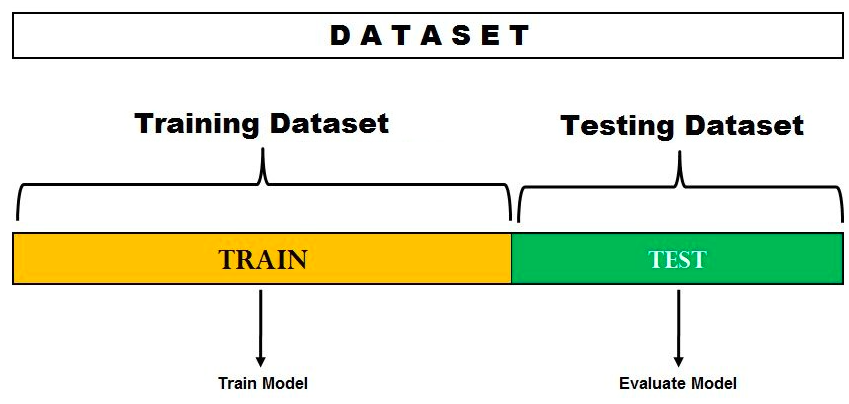



train_test_split digunakan untuk menguji klasifikasi dengan menggunakan repeated hold out. Parameternya sebagai berikut :
* arrays : data yang akan digunakan
* test_size : jumlah data tes; default : 0.25
* train_size : jumlah data train; sisa dari test_size

  jika salah satu dari test_size atau train_size terisi, maka yang lain akan terisi otomatis sisanya
* shuffle
* random_state

---
Sumber : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [20]:
# mengambil fitur/variabel masukan
X = titanic1.drop(columns = ['survived'])
y = titanic1['survived']

# membagi data menjadi data training:testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)



2. Cross Validation

Membagi data menjadi training:testing, namun dibagi sebanyak n-kali dengan posisi data yang menjadi data testing yang berbeda-beda



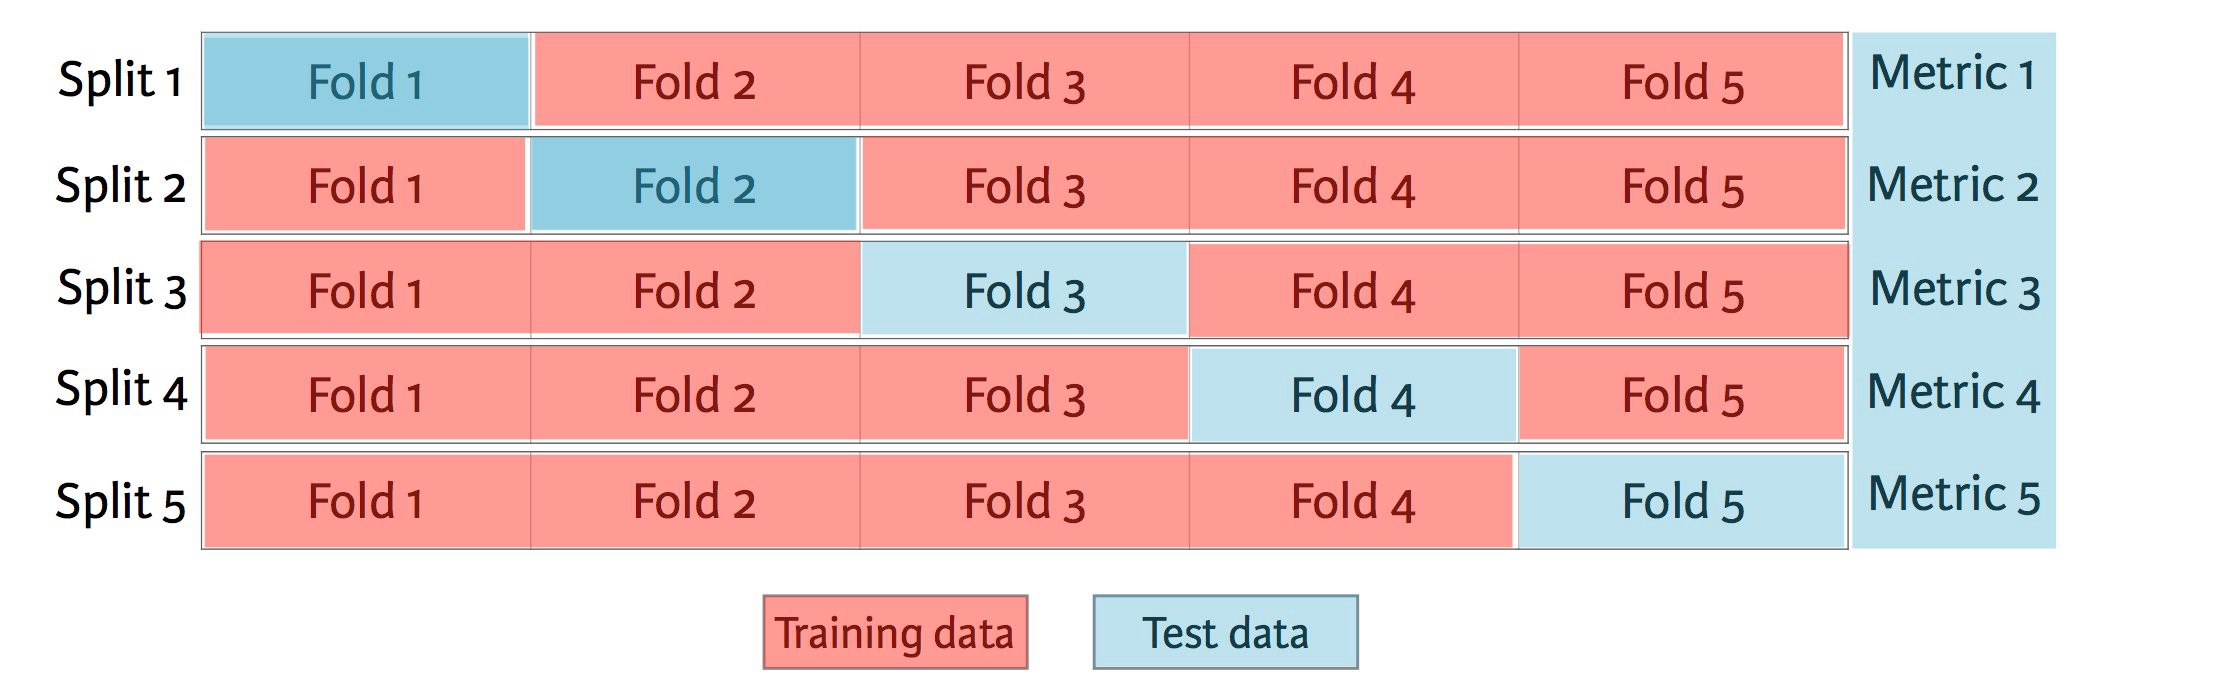

KFold merupakan library yang digunakan untuk menguji klasifikasi menggunakan metode Cross Validation. Parameter yang digunakan sebagai berikut :
* n_split : total fold yang digunakan; default = 5
* shuffle : parameter apakah setiap fold diacak atau tidak; default = False
* random_state : digunakan apabila shuffle = True, sebagai penanda *randomness* dari setiap fold, jika tidak diisi bisa mengakibatkan nilai akurasi berubah setiap kali running

---
Sumber : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html


In [21]:
# define kfold for cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Classification Task

## SVM

##### Cross Validation

In [22]:
# Klasifikasi SVM menggunakan Cross Validation
svm = SVC()

Untuk mengambil nilai dari masing-masing fold, maka menggunakan cross_val_score. Parameter sebagai berikut :
* estimator : metode klasifikasi yang digunakan untuk memprediksi
* x : fitur
* y : kelas
* scoring : nilai yang digunakan sebagai pengukuran evaluasi, diantaranya "accuracy", "precision", "recall"
* cv : metode cross validation yang digunakan

---
Sumber :
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
* https://scikit-learn.org/stable/modules/model_evaluation.html

In [23]:
cv_score_svm = cross_val_score(svm, X_train, y_train, cv=kfold, scoring="accuracy")

print('Nilai akurasi tiap fold: {}'.format(cv_score_svm))
print('Nilai akurasi rata-rata: {}'.format(cv_score_svm.mean()))

Nilai akurasi tiap fold: [0.65734266 0.63636364 0.62676056 0.73239437 0.70422535]
Nilai akurasi rata-rata: 0.6714173150792869


Untuk mengambil nilai dari masing-masing fold dengan banyak scoring yang ditampilkan, maka bisa menggunakan cross_validate dengan parameter yang sama dengan cross_val_score, namun parameter scoring bisa diisi array

---
Sumber :
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [26]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
print(cross_validate(svm, X_train, y_train, cv=kfold, scoring=scoring))

{'fit_time': array([0.03264499, 0.0346992 , 0.03219438, 0.03209138, 0.027771  ]), 'score_time': array([0.03588438, 0.03273749, 0.04682207, 0.03449774, 0.02899194]), 'test_accuracy': array([0.65734266, 0.63636364, 0.62676056, 0.73239437, 0.70422535]), 'test_precision': array([0.70588235, 0.52380952, 0.69230769, 0.68181818, 0.75      ]), 'test_recall': array([0.21428571, 0.20754717, 0.28571429, 0.32608696, 0.24      ]), 'test_f1': array([0.32876712, 0.2972973 , 0.40449438, 0.44117647, 0.36363636]), 'test_roc_auc': array([0.68729475, 0.7009434 , 0.73839662, 0.73188406, 0.67804348])}


###### Hypertuning Parameter with CV

Untuk SVM bisa menggunakan SVC untuk klasifikasi. Parameter yang digunakan adalah sebagai berikut :
* kernel -> 'linear', 'poly', 'rbf'; default = 'rbf'

---

Sumber : 
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Note :
Beberapa metode SVM memerlukan waktu yang lama (tergantung data)

In [27]:
params = {
        'kernel': ['linear', 'poly', 'rbf']
        }

svm_classifierCV = GridSearchCV(SVC(), params, cv= kfold, scoring= 'accuracy')
svm_classifierCV.fit(X_train,y_train)

# print parameter terbaik
print('Parameter terbaik: {0} \ndengan nilai akurasi pada data training: {1}'.format(svm_classifierCV.best_params_, svm_classifierCV.best_score_))

Parameter terbaik: {'kernel': 'linear'} 
dengan nilai akurasi pada data training: 0.7935388555106865


In [28]:
pred = svm_classifierCV.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [29]:
roc_auc = roc_auc_score(y_test,pred)
f1score = f1_score(y_test,pred)
precisionscore = precision_score(y_test,pred)

print("Precision Score: {}".format(precisionscore))
print("F1 Score: {}".format(f1score))
print("AUC Score: {}".format(roc_auc))

Precision Score: 0.7647058823529411
F1 Score: 0.7323943661971832
AUC Score: 0.7751608751608752


##### Repeated holdout

In [30]:
svm = SVC()
# untuk melakukan training, data harus disesuaikan dengan model, hal ini bisa dilakukan dengan menggunakan metode .fit (berlaku untuk semua model)
svm.fit(X_train, y_train)

# untuk mengetahui confusion matrix, bisa menggunakan library classification report dengan sebelumnya melakukan proses prediksi menggunakan metode .predict
predict = svm.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179



In [31]:
roc_auc = roc_auc_score(y_test,predict)
f1score = f1_score(y_test,predict)
precisionscore = precision_score(y_test,predict)

print("Precision Score: {}".format(precisionscore))
print("F1 Score: {}".format(f1score))
print("AUC Score: {}".format(roc_auc))

Precision Score: 0.75
F1 Score: 0.3673469387755103
AUC Score: 0.593050193050193


## Random Forest

In [32]:
randomforest = RandomForestClassifier()

##### Cross Validation

In [33]:
print(cross_val_score(randomforest, X_train, y_train, cv=kfold, scoring="accuracy"))
print(cross_val_score(randomforest, X_train, y_train, cv=kfold, scoring="accuracy").mean())

[0.8041958  0.76923077 0.76760563 0.8028169  0.76760563]
0.7809021963951541


In [34]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
print(cross_validate(randomforest, X_train, y_train, cv=kfold, scoring=scoring))

{'fit_time': array([0.38724208, 0.31497216, 0.31226397, 0.30947781, 0.28229237]), 'score_time': array([0.06404901, 0.06335092, 0.05598211, 0.05226326, 0.04534793]), 'test_accuracy': array([0.7972028 , 0.76223776, 0.77464789, 0.8028169 , 0.78169014]), 'test_precision': array([0.73684211, 0.70212766, 0.79245283, 0.70454545, 0.71111111]), 'test_recall': array([0.75      , 0.62264151, 0.66666667, 0.67391304, 0.64      ]), 'test_f1': array([0.74336283, 0.66      , 0.72413793, 0.68888889, 0.67368421]), 'test_roc_auc': array([0.8441092 , 0.83218029, 0.83313241, 0.83140851, 0.8825    ])}


###### Hypertuning Parameter with CV

Klasifikasi menggunakan library RandomForestClassifier memiliki beberapa parameter yang bisa diubah untuk menentukan metode mana yang memberikan nilai paling baik. Diantaranya :
* n_estimator : merepresentasikan jumlah pohon
* max_dept : merepresentasikan kedalaman node dalam pohon

---


Sumber : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [38]:
params = {
    'n_estimators': [50, 150],
    'max_depth': [1,2]
}

rf_classifierCV = GridSearchCV(RandomForestClassifier(), params, cv= kfold, scoring= 'accuracy')
rf_classifierCV.fit(X_train,y_train)

# print parameter terbaik
print('Parameter terbaik: {0} \ndengan nilai akurasi pada data training: {1}'.format(rf_classifierCV.best_params_, rf_classifierCV.best_score_))

Parameter terbaik: {'max_depth': 2, 'n_estimators': 150} 
dengan nilai akurasi pada data training: 0.7907219541022358


In [36]:
pred = rf_classifierCV.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       105
           1       0.84      0.55      0.67        74

    accuracy                           0.77       179
   macro avg       0.79      0.74      0.75       179
weighted avg       0.78      0.77      0.76       179



In [39]:
roc_auc = roc_auc_score(y_test,predict)
f1score = f1_score(y_test,predict)
precisionscore = precision_score(y_test,predict)

print("Precision Score: {}".format(precisionscore))
print("F1 Score: {}".format(f1score))
print("AUC Score: {}".format(roc_auc))

Precision Score: 0.75
F1 Score: 0.3673469387755103
AUC Score: 0.593050193050193


##### Repeated holdout

In [40]:
# untuk melakukan training, data harus disesuaikan dengan model, hal ini bisa dilakukan dengan menggunakan metode .fit (berlaku untuk semua model)
randomforest.fit(X_train, y_train)

# untuk mengetahui confusion matrix, bisa menggunakan library classification report dengan sebelumnya melakukan proses prediksi menggunakan metode .predict
predict = randomforest.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [42]:
roc_auc = roc_auc_score(y_test,predict)
f1score = f1_score(y_test,predict)
precisionscore = precision_score(y_test,predict)

print("Precision Score: {}".format(precisionscore))
print("F1 Score: {}".format(f1score))
print("AUC Score: {}".format(roc_auc))

Precision Score: 0.7671232876712328
F1 Score: 0.761904761904762
AUC Score: 0.7974259974259975
